In [1]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [2]:
# Global Variables
stock_name = 'esgv' # ticker symbol
train = 0 # 1 for train, 0 for pass
days_ahead = 1 # for predicting 1, 3, or 5 days ahead
days_back = -1 # -1 for current data point, -2 for two days ago, etc...
cv = 5 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'a': '11/15/1999'# Updated 1/5/21 1D, 3D, 5D ahead
               , 'aapl':'12/12/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'acy': '01/18/1998' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'adbe': '08/11/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'amd': '03/17/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'baba': '09/15/2014' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'bac': '02/19/1973' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'crm': '06/23/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'esgv': '09/16/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'goog': '08/16/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ibm': '01/02/1962' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'idex': '05/23/2007' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'intc': '03/16/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'iyw': '05/15/2000' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ma': '05/21/2006' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'msft': '03/10/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nio': '09/10/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nvda': '01/22/1999' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'pypl': '07/05/2015' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'tsla': '06/29/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'v': '03/16/2008' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbiv': '09/04/2002' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbr': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'viov': '09/06/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vgt': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
              }

In [4]:
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, start_dates[stock_name], days_ahead)
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction
Date,,,,,,,,,,,,
2020-12-21,69.339996,68.129997,69.070000,69.239998,400100.0,69.239998,-0.002461,0.017760,-0.002737,0.006761,3.708280e-03,1
2020-12-22,69.570000,69.000000,69.570000,69.339996,369800.0,69.339996,0.003306,0.008261,0.001444,0.004194,1.358216e-03,-1
2020-12-23,69.690002,69.279999,69.660004,69.309998,286200.0,69.309998,0.005024,0.005918,-0.000433,0.004188,7.507633e-04,1
2020-12-24,69.580002,69.279999,69.550003,69.580002,140500.0,69.580002,-0.000431,0.004330,0.003896,0.002722,8.986090e-08,1
2020-12-28,70.110001,69.830002,70.000000,70.029999,281100.0,70.029999,-0.000429,0.004010,0.006467,0.003600,1.727586e-03,-1
2020-12-29,70.410004,69.629997,70.410004,69.809998,338500.0,69.809998,0.008522,0.011202,-0.003142,0.003728,1.646601e-03,1
2020-12-30,70.099998,69.820000,70.089996,69.910004,224000.0,69.910004,0.002568,0.004010,0.001433,0.003728,1.644264e-03,1
2020-12-31,70.290001,69.739998,69.940002,70.169998,221900.0,70.169998,-0.003288,0.007886,0.003719,0.003610,2.474589e-03,-1
2021-01-04,70.739998,68.510002,70.739998,69.300003,447700.0,69.300003,0.020356,0.032550,-0.012398,0.007386,-7.842105e-04,1


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
if train == 1:
    a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)
elif train == 0:
    pass

In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

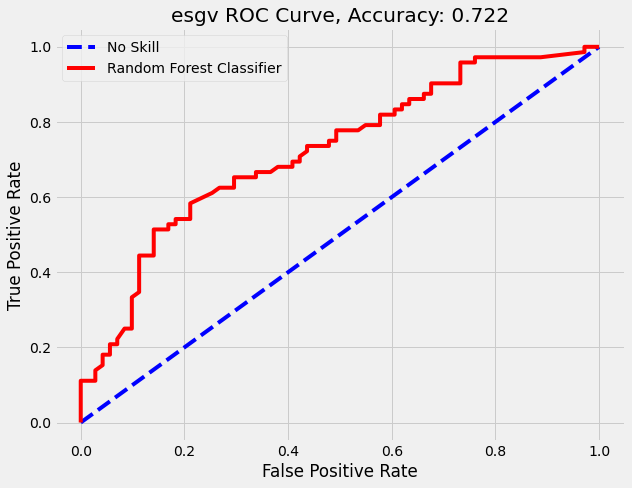

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, model_name)

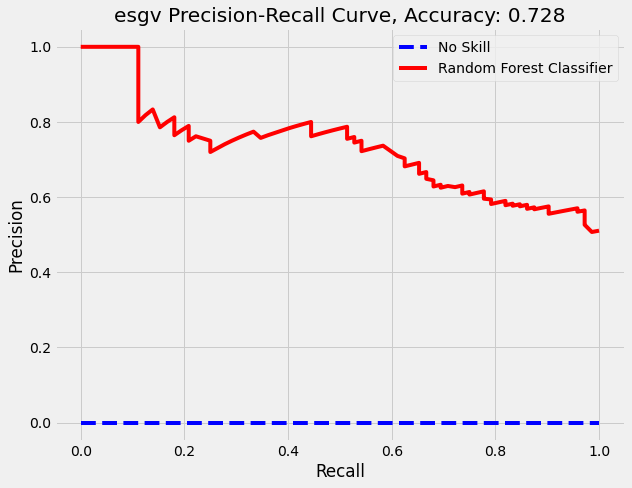

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, model_name)

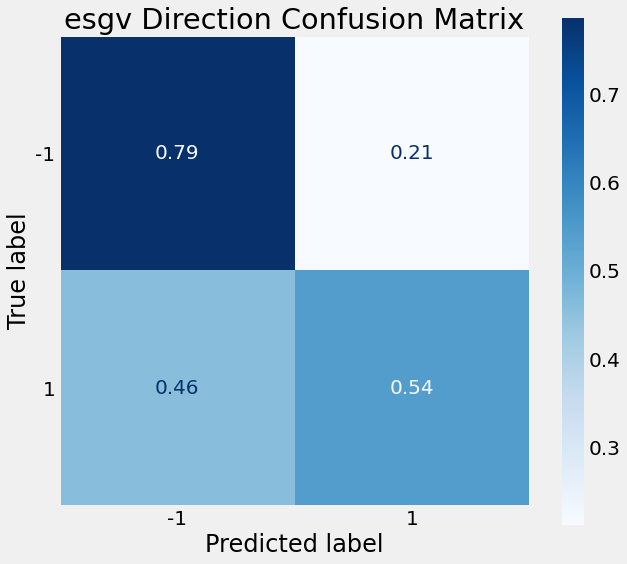

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, stock_name)

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.6380778032036614'

### Prediction...

In [11]:
# Prediction, use last day of data
stock_df.iloc[-1]

High              69.830002
Low               69.120003
Open              69.180000
Close             69.720001
Volume        239810.000000
Adj Close         69.720001
oc                -0.007806
hl                 0.010272
adj                0.006061
5stdev_adj         0.007288
5sma_adj          -0.000866
direction         -1.000000
Name: 2021-01-05 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-days_back]
last

oc            0.000000
hl            0.002794
5stdev_adj    0.003032
5sma_adj     -0.000831
Name: 2018-09-28 00:00:00, dtype: float64

In [13]:
stock_df['adj'].describe()

count    572.000000
mean       0.000763
std        0.016108
min       -0.110297
25%       -0.004153
50%        0.001371
75%        0.008069
max        0.094159
Name: adj, dtype: float64

In [14]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name} {days_ahead} day(s) ahead')
else:
    print(f'Sell or hold {stock_name} {days_ahead} day(s) ahead')

Buy esgv 1 day(s) ahead


### Strategy Returns...

In [15]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [16]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-29,70.410004,69.629997,70.410004,69.809998,338500.0,69.809998,0.008522,0.011202,-0.003142,0.003728,0.001647,1,-1,-0.001433
2020-12-30,70.099998,69.820000,70.089996,69.910004,224000.0,69.910004,0.002568,0.004010,0.001433,0.003728,0.001644,1,-1,-0.003719
2020-12-31,70.290001,69.739998,69.940002,70.169998,221900.0,70.169998,-0.003288,0.007886,0.003719,0.003610,0.002475,-1,-1,0.012398
2021-01-04,70.739998,68.510002,70.739998,69.300003,447700.0,69.300003,0.020356,0.032550,-0.012398,0.007386,-0.000784,1,1,0.006061
2021-01-05,69.830002,69.120003,69.180000,69.720001,239810.0,69.720001,-0.007806,0.010272,0.006061,0.007288,-0.000866,-1,-1,-0.001371


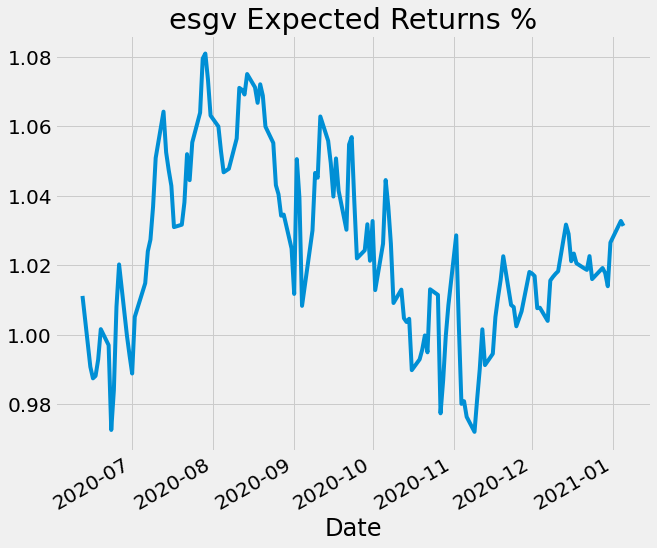

In [17]:
# Don't trade every day!
import matplotlib.pyplot as plt
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot()
plt.title(f'{stock_name} Expected Returns %');

In [18]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

1.1573327278391805

In [19]:
# multiple times original investment, not bad but...

In [20]:
# If purchased in 2012 and left it until now
test_idx = int(len(stock_df)*0.75)
(stock_df['Close'][-1] - stock_df['Close'][-test_idx]) / stock_df['Close'][-test_idx]

0.3710915105766517

In [21]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/

### Training

In [22]:
# this takes a while, 10.5+ hours!
# stocks = [x for x in start_dates]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

### Recording Results